1. Data loading and prelimenary analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load the dataset
df= pd.read_csv("penguins.csv")

#display the first few rows
print(df.head())

#label dataset structure
print("Number of rows and colums:)", df.shape)
print("Data types of each column:)", df.dtypes)

   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
Number of rows and colums:) (344, 9)
Data types of each column:) rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
d

2. Data cleaning and preprocessing

In [7]:
#check for missing values

print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [8]:
#drop values for rows with no int type attributes and randomly assign sex and year based on the mean for variables with missing 'sex' and 'year' attributes

#remove rows with missing integer values
df= df.dropna()

#Asign random 'sex' attribute to rows missing sex
df['sex']= df['sex'].fillna(np.random.choice(['male', 'female']))

#Assign random 'year' attribute to rows missing year
df['year']= df['year'].fillna(np.random.choice([2007, 2008, 2009]))

print(df)

     rowid    species     island  bill_length_mm  bill_depth_mm  \
0        1     Adelie  Torgersen            39.1           18.7   
1        2     Adelie  Torgersen            39.5           17.4   
2        3     Adelie  Torgersen            40.3           18.0   
4        5     Adelie  Torgersen            36.7           19.3   
5        6     Adelie  Torgersen            39.3           20.6   
..     ...        ...        ...             ...            ...   
339    340  Chinstrap      Dream            55.8           19.8   
340    341  Chinstrap      Dream            43.5           18.1   
341    342  Chinstrap      Dream            49.6           18.2   
342    343  Chinstrap      Dream            50.8           19.0   
343    344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
0                181.0       3750.0    male  2007  
1                186.0       3800.0  female  2007  
2                195.0       3250.0  fe

3. Exploratory data analysis

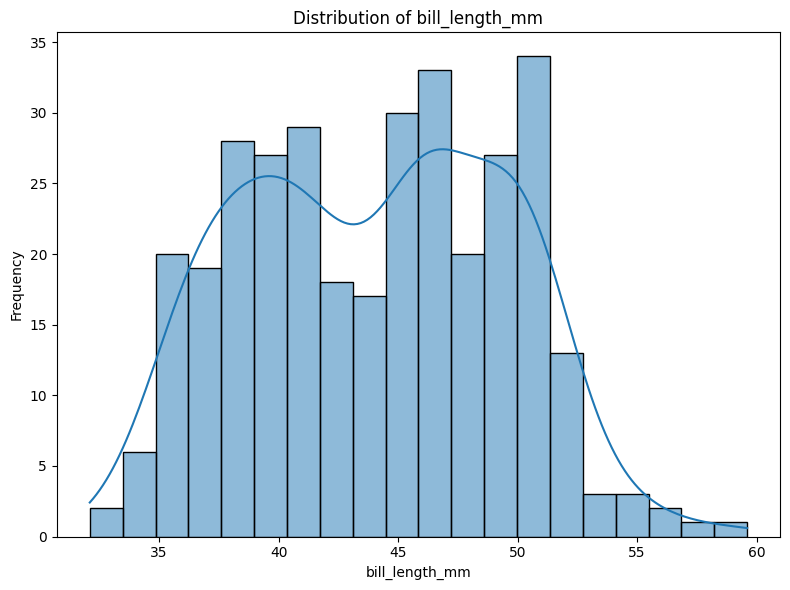

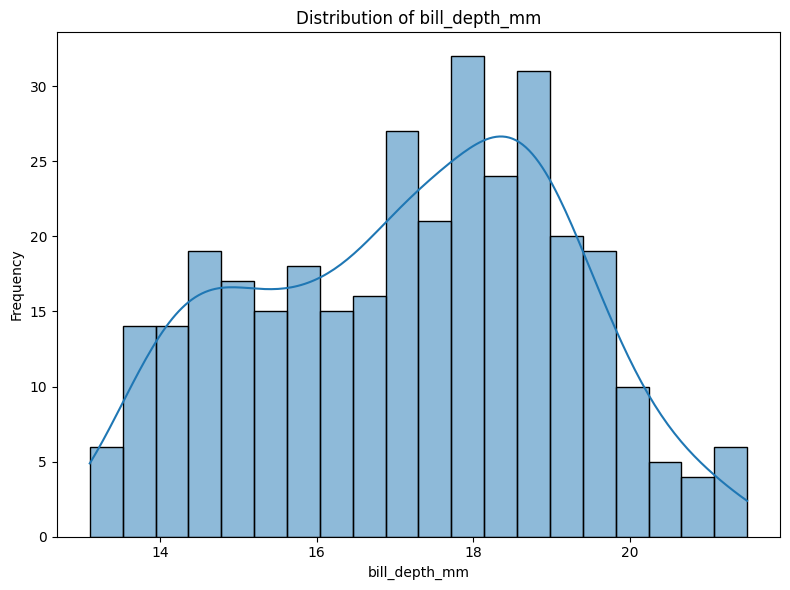

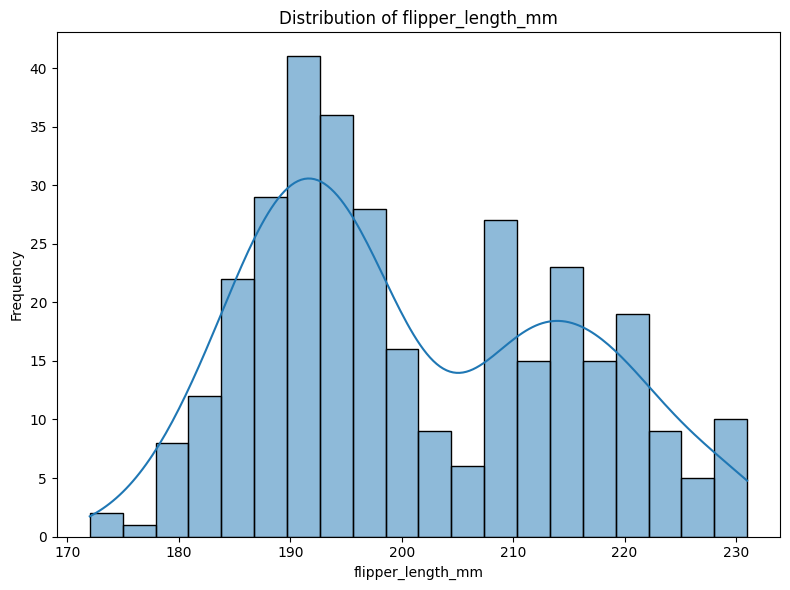

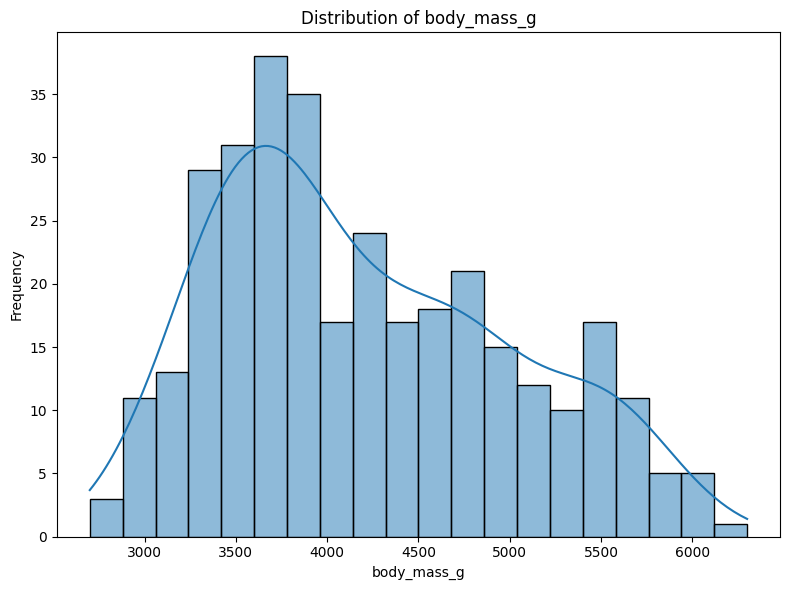

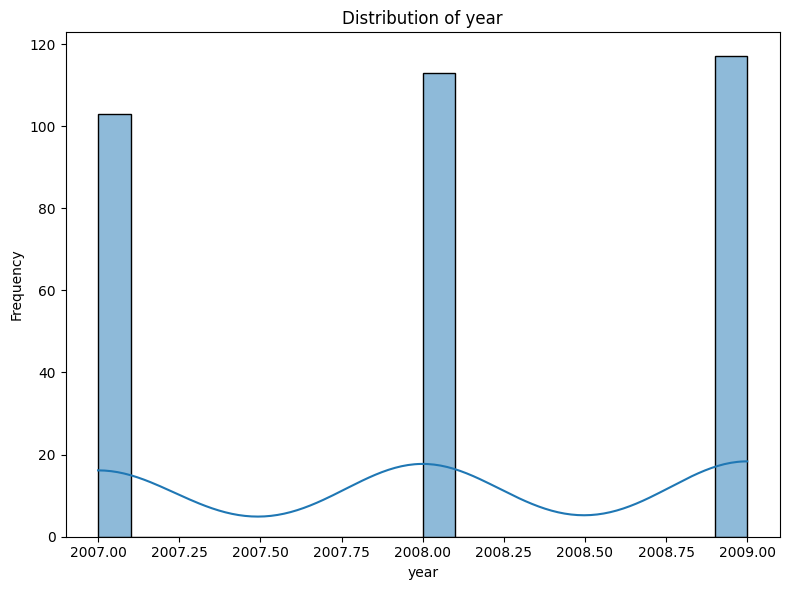

In [9]:
#plot numerical features in histogram

numerical_features= ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

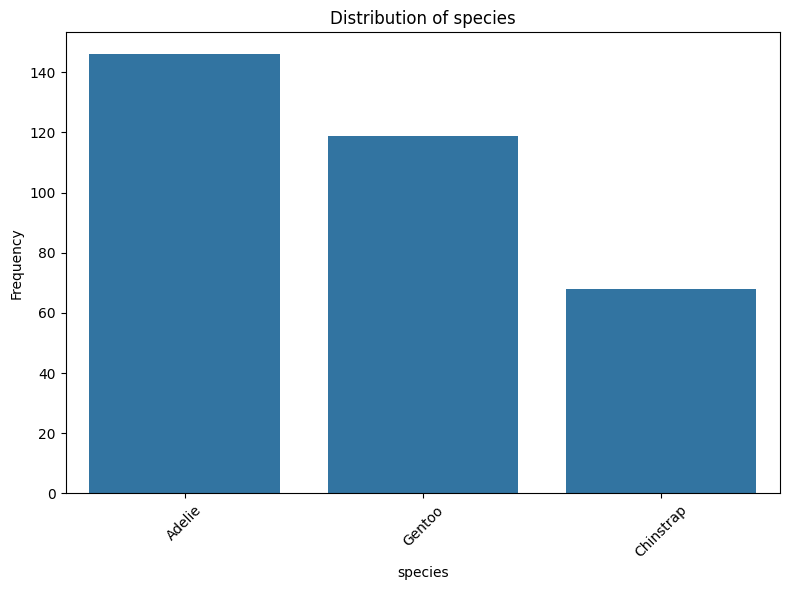

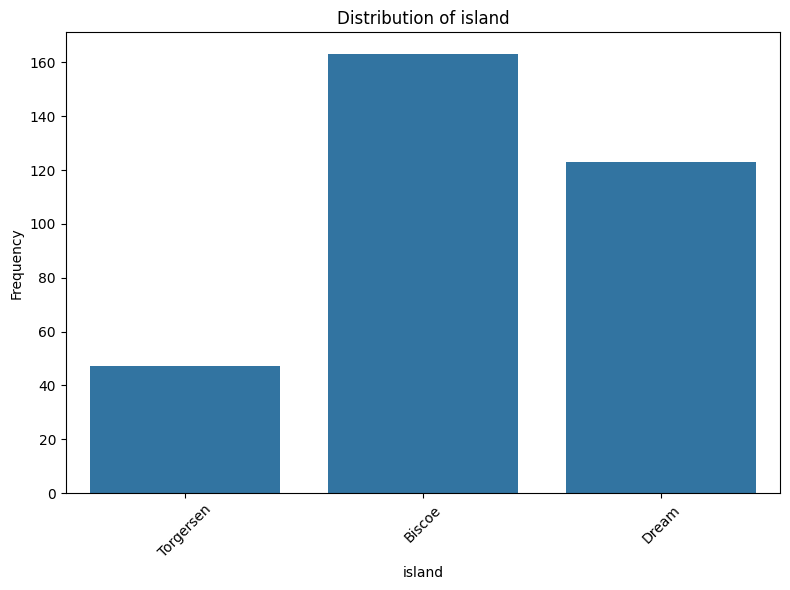

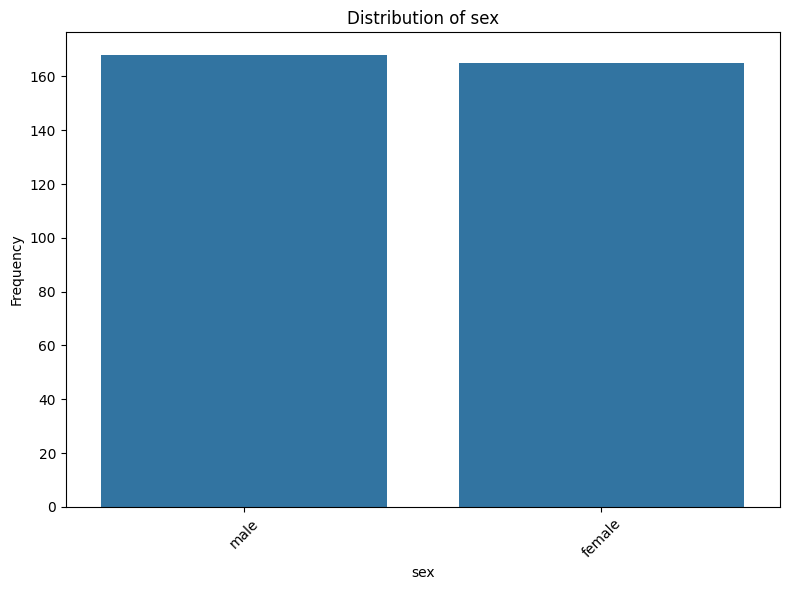

In [10]:
# plot categorical attributes in bar chart

categorical_features= ['species', 'island', 'sex']

for feature in categorical_features:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

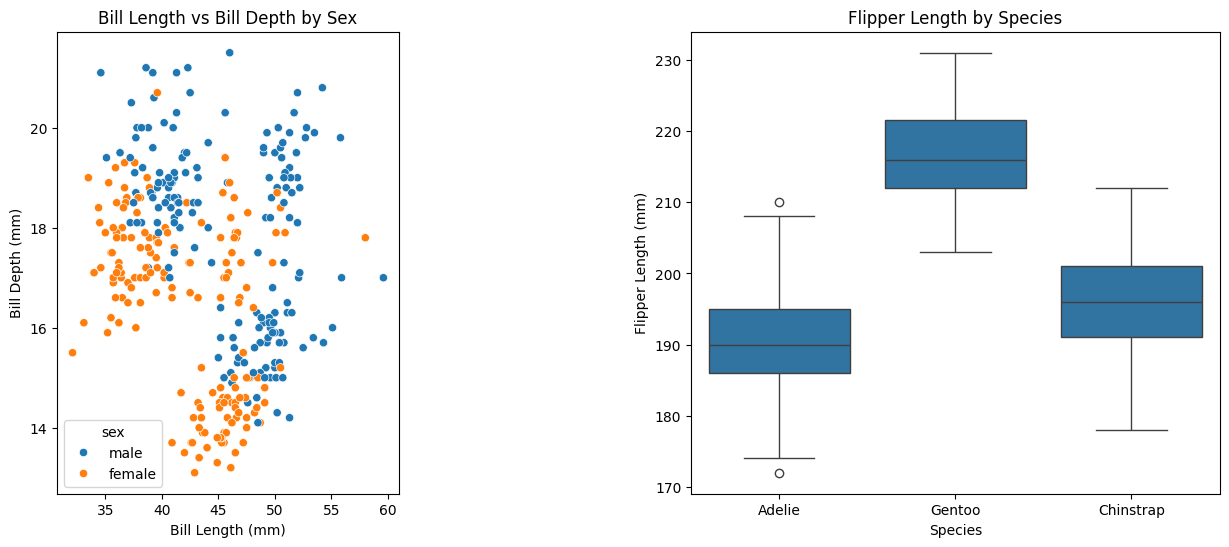

In [11]:
#scatter plots to explore relationships between features

plt.figure(figsize=(15, 6))

#Bill length and depth by sex

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex')
plt.title('Bill Length vs Bill Depth by Sex')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

#Flipper size by species
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='species', y='flipper_length_mm')
plt.title('Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')

plt.show()

4. Advanced Statistical Analysis

In [12]:
# Calcualte the mean for each attribute

mean_values= df.iloc[:, 1:].mean(numeric_only=True)

#dsiplay the results
print("Mean values for each attribute:")
print(mean_values)

Mean values for each attribute:
bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64


In [13]:
#compute the inner product between the columns of the centered data matrix(Numerical Attributes only)

#extract numerical attributes
numerical_data= df.iloc[:, 1:].select_dtypes(include=[np.number])

#center the data by subracting the mean of each column
centered_data=numerical_data - numerical_data.mean()

#compute inner product of the centered data matrix
inner_product_matrix= np.dot(centered_data.T, centered_data)

#display result
print("Inner Product Matrix:")
print(pd.DataFrame(inner_product_matrix,
                   index=numerical_data.columns,
                   columns=numerical_data.columns))


Inner Product Matrix:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm        9928.902703    -817.414324       1.661932e+04   
bill_depth_mm         -817.414324    1287.458919      -5.294486e+03   
flipper_length_mm    16619.320721   -5294.486486       6.521864e+04   
body_mass_g         861746.936937 -248487.432432       3.270928e+06   
year                    48.200901     -25.608108       5.714625e+02   

                    body_mass_g         year  
bill_length_mm     8.617469e+05    48.200901  
bill_depth_mm     -2.484874e+05   -25.608108  
flipper_length_mm  3.270928e+06   571.462462  
body_mass_g        2.152597e+08  4751.201201  
year               4.751201e+03   219.411411  


In [14]:
#Compute the Sample Covariance Matrix (Outer Product): Use the outer product between the centered data points(Numerical Attributes only)

#extract numerical attributes
numerical_data= df.iloc[:, 1:].select_dtypes(include=[np.number])

#center the data by subracting the mean of each column
centered_data=numerical_data - numerical_data.mean()

#compute the sample covariance matrix
sample_covariance_matrix= np.cov(centered_data.T)

#display result
print("Sample Covariance Matrix:")
print(pd.DataFrame(sample_covariance_matrix,
                   index=numerical_data.columns,
                   columns=numerical_data.columns))


Sample Covariance Matrix:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm          29.906333      -2.462091          50.058195   
bill_depth_mm           -2.462091       3.877888         -15.947248   
flipper_length_mm       50.058195     -15.947248         196.441677   
body_mass_g           2595.623304    -748.456122        9852.191649   
year                     0.145183      -0.077133           1.721272   

                     body_mass_g       year  
bill_length_mm       2595.623304   0.145183  
bill_depth_mm        -748.456122  -0.077133  
flipper_length_mm    9852.191649   1.721272  
body_mass_g        648372.487699  14.310847  
year                   14.310847   0.660878  


In [15]:
#Compute the Correlation Between Two Attributes(bill_length_mm, bill_depth_mm)

#compute coorelation using pandas
correlation= df['bill_length_mm'].corr(df['bill_depth_mm'])

print("Correlation between bill_length_mm and bill_depth_mm:", correlation)

Correlation between bill_length_mm and bill_depth_mm: -0.22862563591302895


Correlation between bill_length_mm and bill_depth_mm: -0.228625635913029


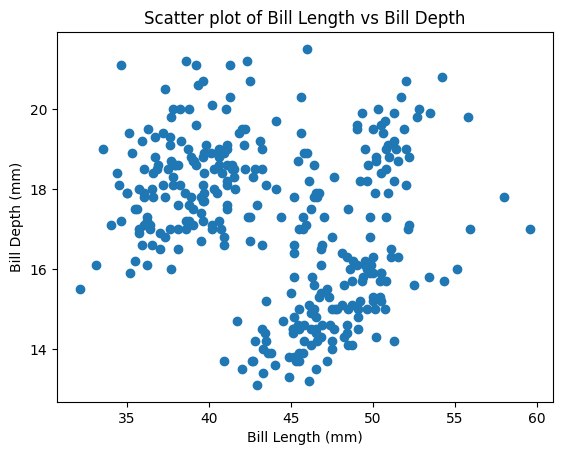

In [16]:
# Compute the correlation between the two attributes(bill_length_mm, bill_depth_mm) by cal culating the cosine of the angle between the centered attribute vectors. Include a scatter plot of these two attributes.

#center vectors for both data attributes
bill_length_centered= df['bill_length_mm'] - df['bill_length_mm'].mean()
bill_depth_centered= df['bill_depth_mm'] - df['bill_depth_mm'].mean()

#coompute cosine similarity to find correlation
dot_product = np.dot(bill_length_centered, bill_depth_centered)
norm_product = np.linalg.norm(bill_length_centered) * np.linalg.norm(bill_depth_centered)

correlation= dot_product / norm_product

#dsiplay result
print("Correlation between bill_length_mm and bill_depth_mm:", correlation)

#scatter splot display
plt.scatter(df['bill_length_mm'], df['bill_depth_mm'])
plt.title("Scatter plot of Bill Length vs Bill Depth")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")

plt.show()

In [17]:
#Compute the Covariance matrix of the three categorical attributes(species, island, and sex)

#encode the categorical attributes into numerical attributes
encoded_df = pd.get_dummies(df[['species', 'island', 'sex']])

#compute the covariance matrix
covariance_matrix= np.cov(encoded_df.T)

#display result
print("Covariance Matrix:")
print(pd.DataFrame(covariance_matrix,
                   index=encoded_df.columns,
                   columns=encoded_df.columns))

Covariance Matrix:
                   species_Adelie  species_Chinstrap  species_Gentoo  \
species_Adelie           0.246952          -0.089801       -0.157151   
species_Chinstrap       -0.089801           0.162994       -0.073194   
species_Gentoo          -0.157151          -0.073194        0.230345   
island_Biscoe           -0.082727          -0.100257        0.182984   
island_Dream             0.003229           0.129165       -0.132394   
island_Torgersen         0.079498          -0.028908       -0.050590   
sex_female               0.001981           0.000923       -0.002904   
sex_male                -0.001981          -0.000923        0.002904   

                   island_Biscoe  island_Dream  island_Torgersen  sex_female  \
species_Adelie         -0.082727      0.003229          0.079498    0.001981   
species_Chinstrap      -0.100257      0.129165         -0.028908    0.000923   
species_Gentoo          0.182984     -0.132394         -0.050590   -0.002904   
island_Bisco

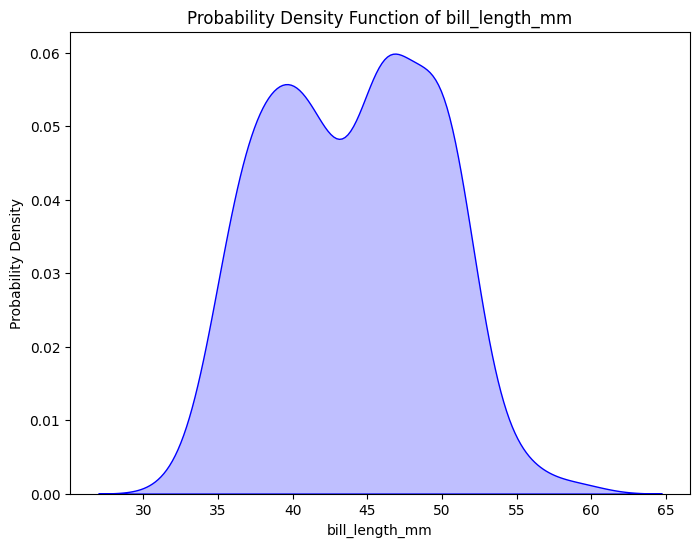

In [20]:
#Probability Density Function: Assuming the first numerical attribute is normally distributed, plot its probability density function

#identify the first numerical attribute
first_numerical_attribute= df.select_dtypes(include=[np.number]).columns[1]

#plot the PDF
plt.figure(figsize=(8, 6))
sns.kdeplot(df[first_numerical_attribute], fill=True, color='blue', label="PDF")
plt.title(f'Probability Density Function of {first_numerical_attribute}')
plt.xlabel(first_numerical_attribute)
plt.ylabel('Probability Density')
plt.show()

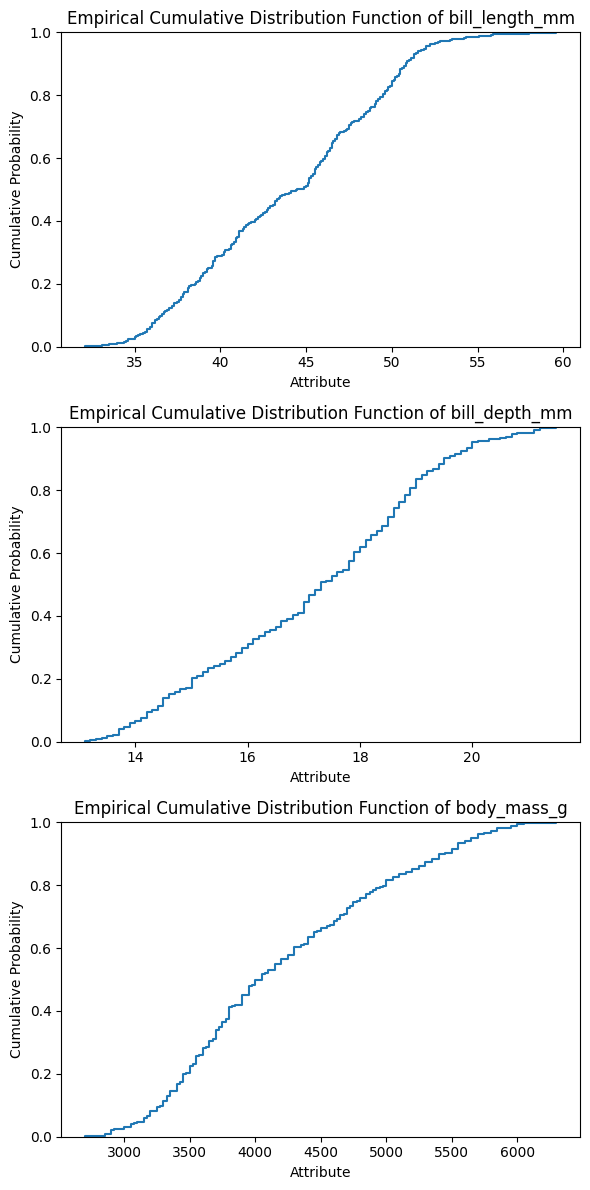

In [33]:
#Plot the Empirical Cumulative Distribution Functions (CDFs) of attributes bill_length_mm, bill_depth_mm, and body_mass_g

#define attributes to plot
attributes=['bill_length_mm', 'bill_depth_mm', 'body_mass_g']

#plot the CDF for reach attribute
plt.figure(figsize=(6, 12))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 1, i)
    sns.ecdfplot(data=df, x=attribute)
    plt.title(f'Empirical Cumulative Distribution Function of {attribute}')
    plt.xlabel("Attribute")
    plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

In [46]:
#Identify the numerical attribute with the largest variance and the one with the smallest variance. Print these values.

#extract numerical values
numerical_data= df.select_dtypes(include=[np.number])

#compute the variances for the data set
variances= numerical_data.var()

#indentify the numerical attribute with the largest variance
max_variance_attribute= variances.idxmax()

#identify the numerical attribute with the smallest variance
min_variance_attribute= variances.idxmin()

#caluclate variances for max and min attributes
max_variance = variances[max_variance_attribute]
min_variance = variances[min_variance_attribute]

#display the results
print(f"Attribute with the largest variance: {max_variance_attribute} (Variance: {max_variance:.2f})")
print(f"Attribute with the smallest variance: {min_variance_attribute} (Variance: {min_variance:.2f})")

Attribute with the largest variance: body_mass_g (Variance: 648372.49)
Attribute with the smallest variance: year (Variance: 0.66)


In [48]:
#Determine which pair of attributes has the largest and smallest covariance. Print these values.

#compute covariance matrix
covariance_matrix= np.cov(numerical_data.T)

#find the largest and smallest covariance
max_covariance= np.max(covariance_matrix)
min_covariance= np.min(covariance_matrix)

#find attribute pairs for max and min covarainces
max_pair = np.unravel_index(np.argmax(covariance_matrix), covariance_matrix.shape)
min_pair = np.unravel_index(np.argmin(covariance_matrix), covariance_matrix.shape)

#display results
print(f"Largest Covariance: {max_covariance:.2f} between {numerical_data.columns[max_pair[0]]} and {numerical_data.columns[max_pair[1]]}")
print(f"Smallest Covariance: {min_covariance:.2f} between {numerical_data.columns[min_pair[0]]} and {numerical_data.columns[min_pair[1]]}")

Largest Covariance: 648372.49 between body_mass_g and body_mass_g
Smallest Covariance: -748.46 between bill_depth_mm and body_mass_g
